In [1]:
#pip install --upgrade helpsk

In [2]:
import helpsk as hlp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from vega_datasets import data
# data.list_datasets()
import seaborn as sns

%matplotlib inline

# Load Data

In [3]:
#https://www.openml.org/d/31
credit_g = fetch_openml('credit-g', version=1)
credit_data = credit_g['data']
credit_data['target'] = credit_g['target']
credit_data.shape

(1000, 21)

## Create Missing Values

In [4]:
credit_data['duration'].iloc[0:10] = np.nan
credit_data['checking_status'].iloc[5:15] = np.nan

/Users/shanekercheval/opt/anaconda3/envs/python-examples/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Summary

In [1]:
hlp.pandas.numeric_summary(credit_data, return_style=True)

NameError: name 'hlp' is not defined

In [2]:
hlp.pandas.non_numeric_summary(credit_data, return_style=True)

NameError: name 'hlp' is not defined

In [18]:
hlp.pandas.count_groups(dataframe=credit_data,
                        group_1='target',
                        group_2='housing',
                        group_sum='credit_amount',
                        return_style=True)

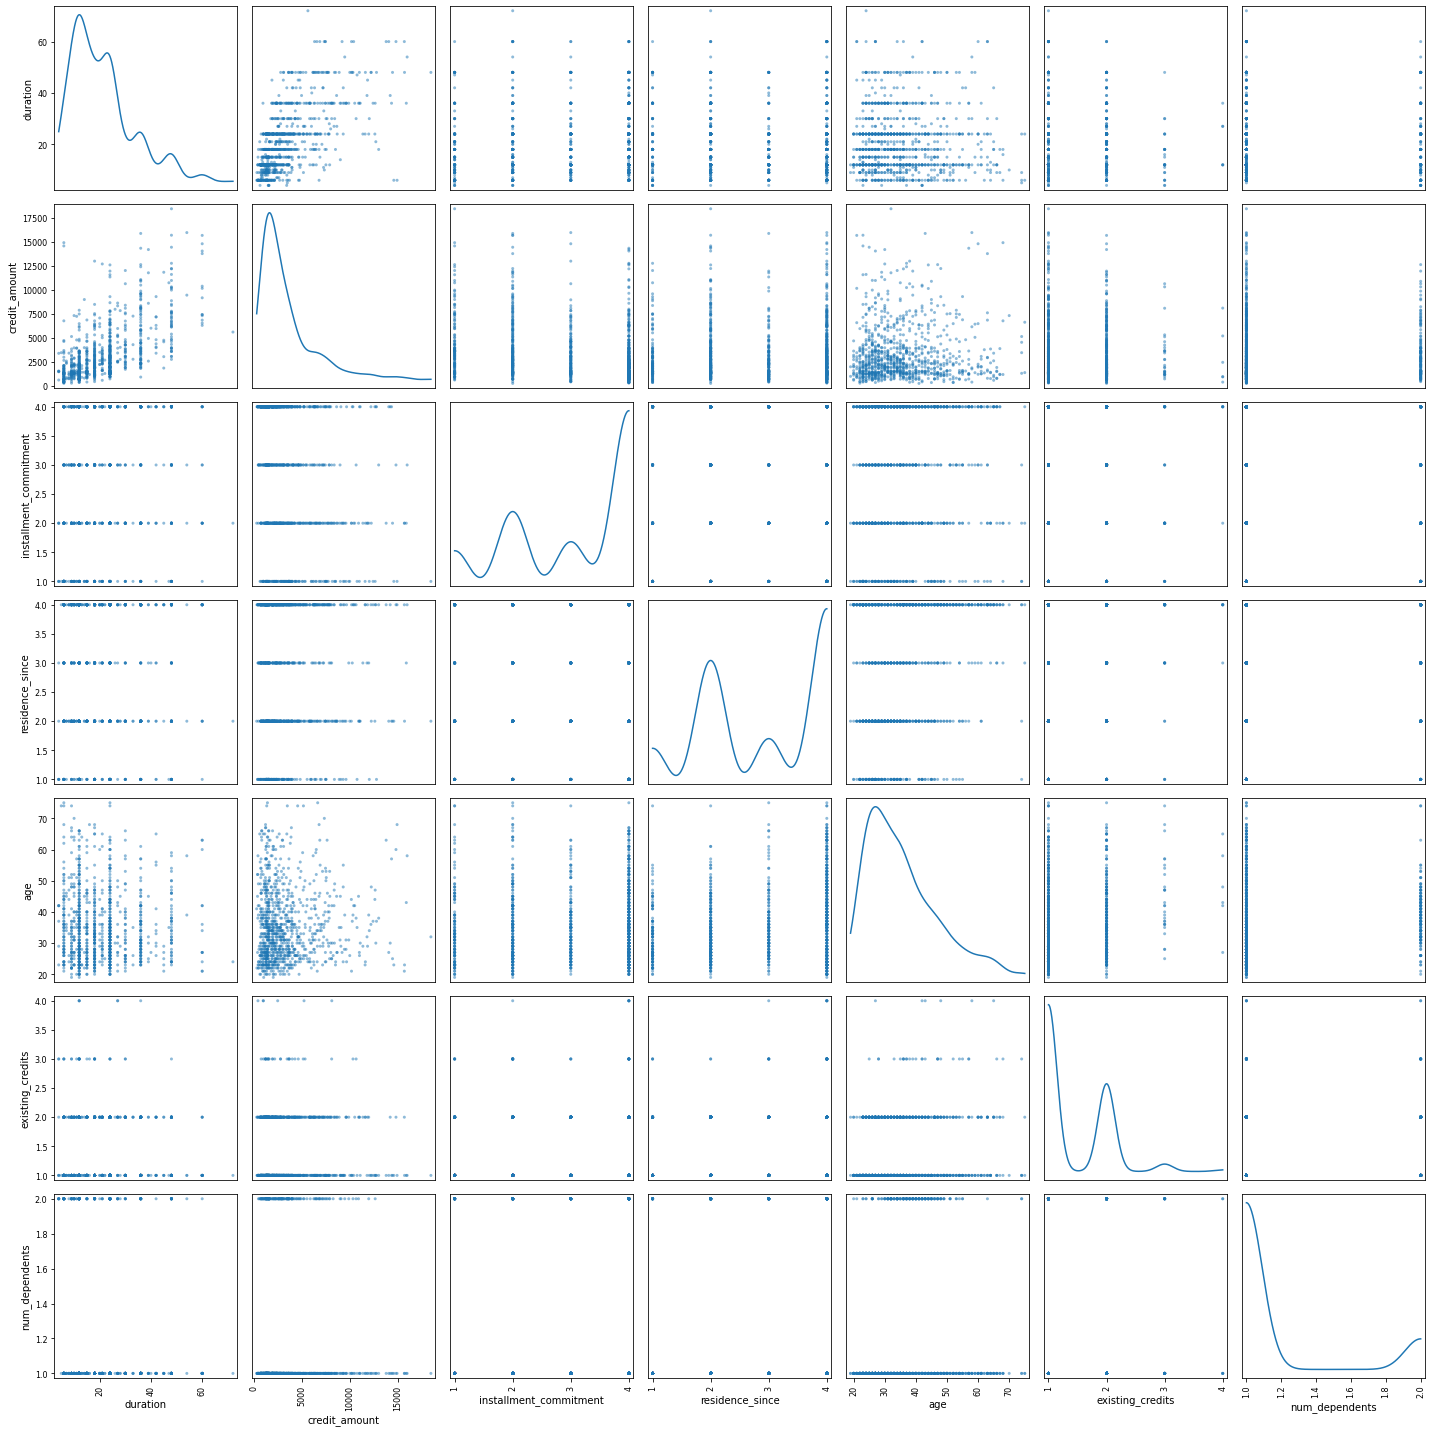

In [19]:
pd.plotting.scatter_matrix(credit_data, figsize=(20, 20), diagonal="kde")
plt.tight_layout()

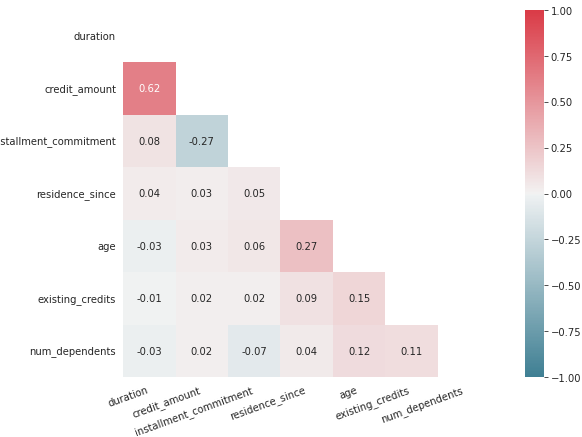

In [20]:
hlp.plot.plot_correlation_heatmap(dataframe=credit_data)

# Numeric Data

In [21]:
target_column = 'credit_amount'

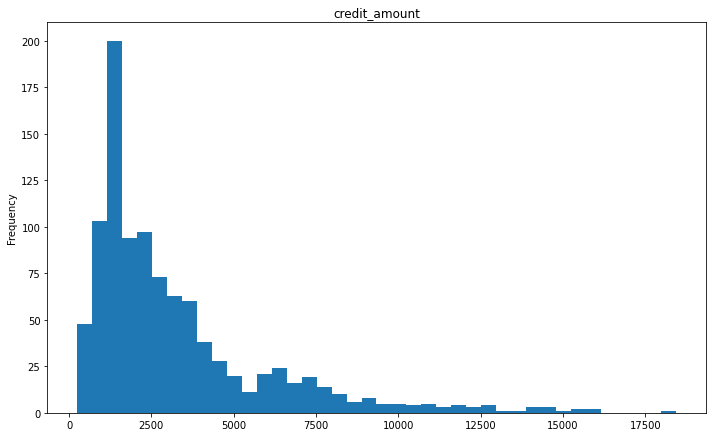

In [22]:
credit_data[target_column].plot.hist(bins=40, figsize=hlp.plot.STANDARD_WIDTH_HEIGHT, title=target_column)
plt.tight_layout()

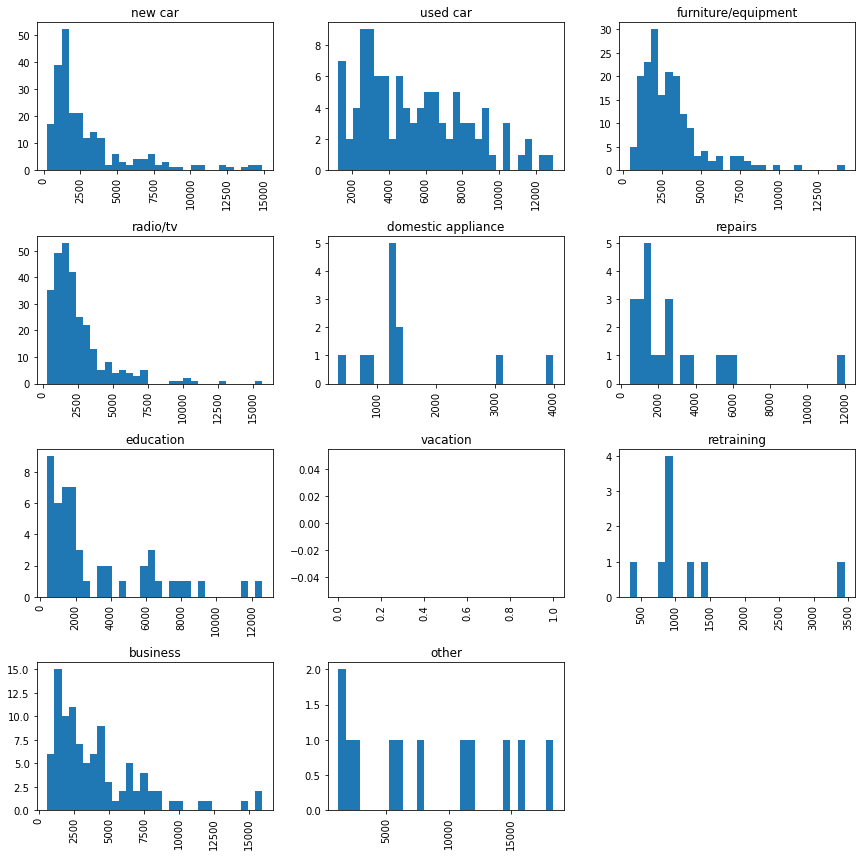

In [23]:
credit_data[target_column].hist(by=credit_data['purpose'], bins=30, figsize=(12, 12))
plt.tight_layout()

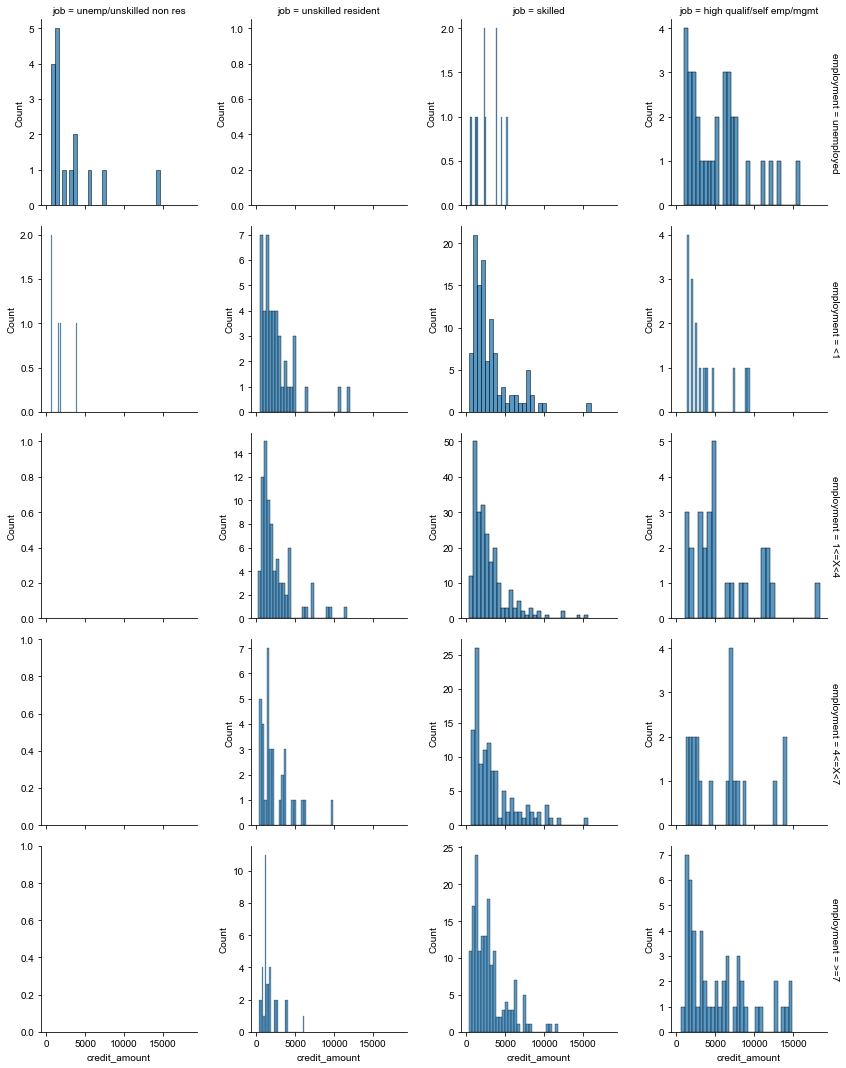

In [24]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g = sns.FacetGrid(credit_data, col="job",  row="employment",
                  sharex=True,
                  sharey=False,
                  margin_titles=True)
g.map_dataframe(sns.histplot, x=target_column, bins=30)
plt.tight_layout()
sns.set(style='white')

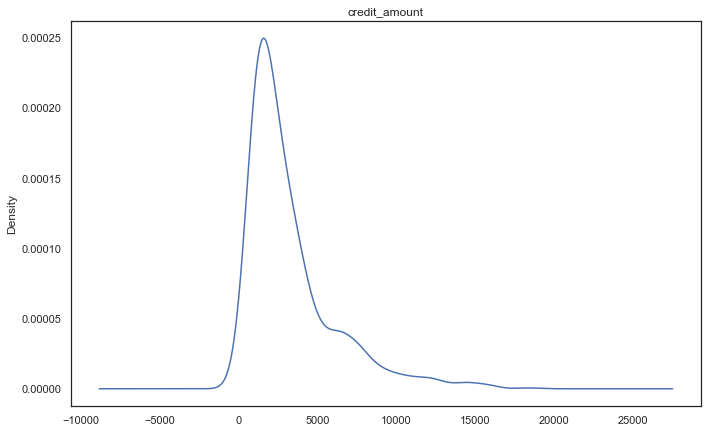

In [25]:
credit_data[target_column].plot.kde(figsize=hlp.plot.STANDARD_WIDTH_HEIGHT, title=target_column)
plt.tight_layout()

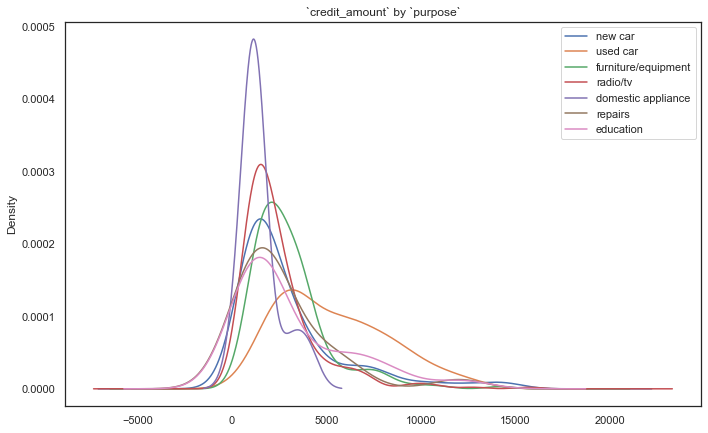

In [26]:
fig, ax = plt.subplots(figsize=hlp.plot.STANDARD_WIDTH_HEIGHT)

try:
    for label, df in credit_data.groupby('purpose'):
        df[target_column].plot(kind="kde", ax=ax, label=label)

except ValueError:
    pass

plt.title(f'`{target_column}` by `purpose`')
plt.legend()
plt.tight_layout()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


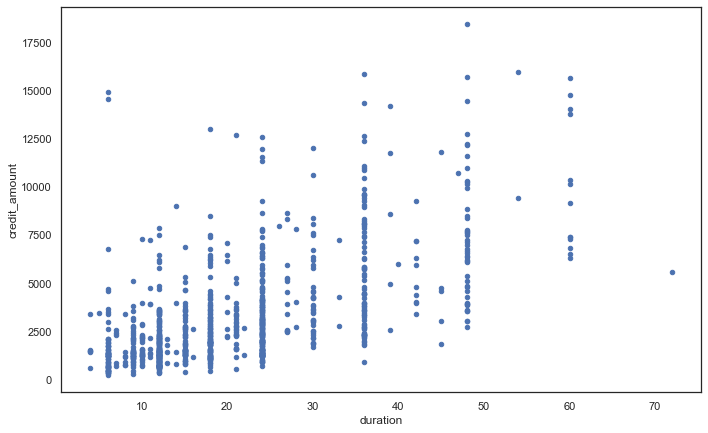

In [27]:
credit_data.plot.scatter(x='duration', y=target_column, figsize=hlp.plot.STANDARD_WIDTH_HEIGHT)
plt.tight_layout()

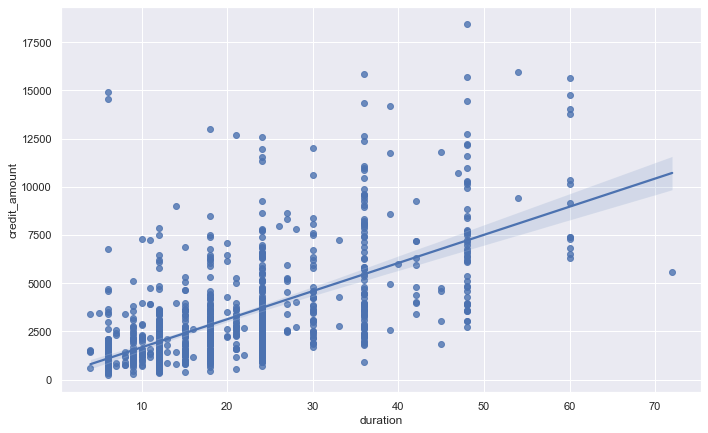

In [28]:
sns.set(rc={'figure.figsize': hlp.plot.STANDARD_WIDTH_HEIGHT})
sns.regplot(x='duration', y=target_column, data=credit_data)
plt.tight_layout()

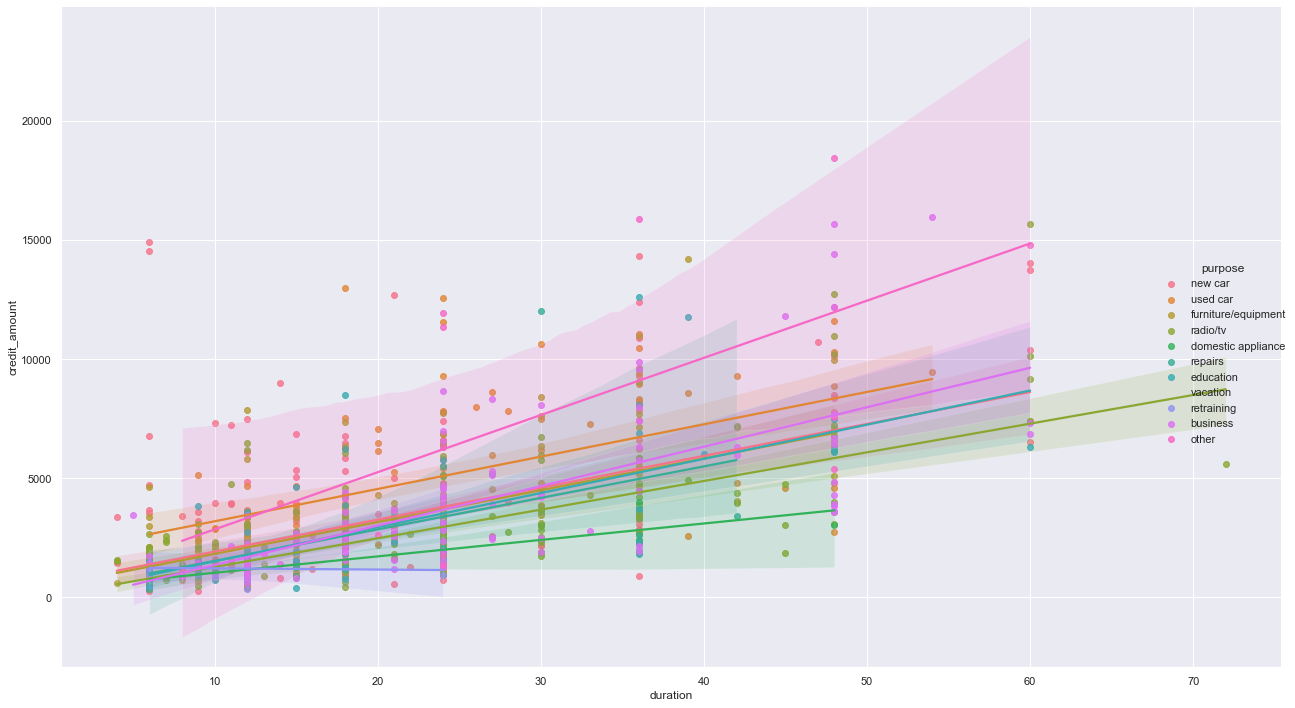

In [29]:
# https://seaborn.pydata.org/generated/seaborn.lmplot.html
sns.lmplot(x='duration', y=target_column, hue='purpose', data=credit_data, height=10, aspect=hlp.plot.GOLDEN_RATIO)
plt.tight_layout()

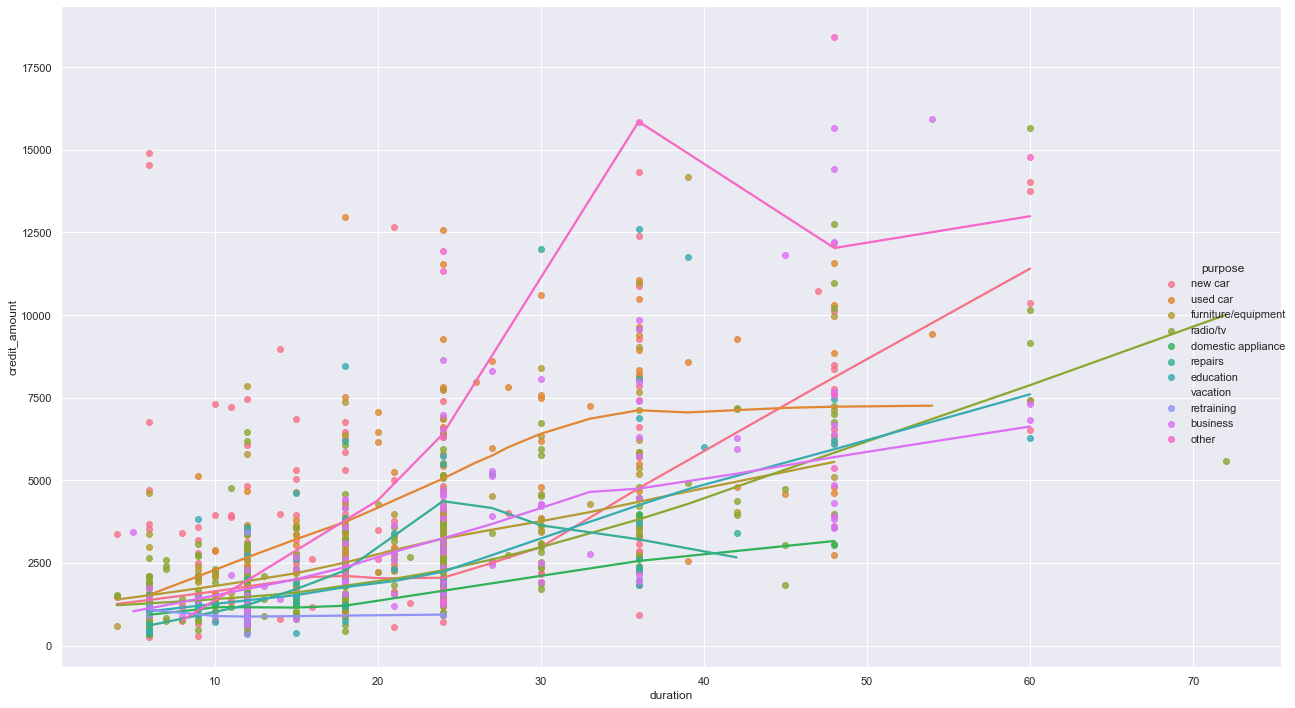

In [30]:
import statsmodels
sns.lmplot(x='duration', y=target_column, hue='purpose', lowess=True, data=credit_data, height=10, aspect=hlp.plot.GOLDEN_RATIO)
plt.tight_layout()

In [31]:
hlp.pandas.value_frequency(credit_data['installment_commitment'], sort_by_frequency=False)

,Frequency,Percent
1.0,136,0.136
2.0,231,0.231
3.0,157,0.157
4.0,476,0.476


In [32]:
[(x * 2) for x in hlp.plot.STANDARD_WIDTH_HEIGHT]

[20, 12.360679774997093]

# Categoric Data

In [33]:
hlp.pandas.value_frequency(credit_data['purpose']).style.bar(vmin=0, subset='Frequency', color=hlp.color.GRAY)

,Frequency,Percent
radio/tv,280,0.280000
new car,234,0.234000
furniture/equipment,181,0.181000
used car,103,0.103000
business,97,0.097000
education,50,0.050000
repairs,22,0.022000
domestic appliance,12,0.012000
other,12,0.012000
retraining,9,0.009000


In [34]:
hlp.pandas.count_groups(dataframe=credit_data, group_1='purpose', return_style=True)

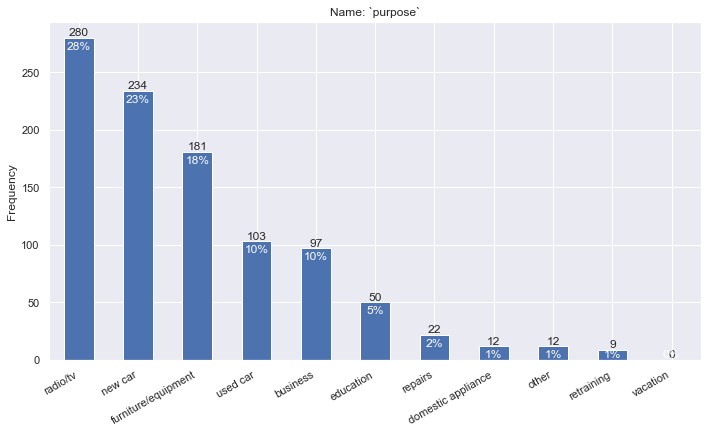

In [35]:
hlp.plot.plot_value_frequency(credit_data['purpose'])

In [36]:
temp = credit_data.groupby(['target', 'job']).agg({'credit_amount': np.mean})
temp.rename({'credit_amount': 'Average Credit Amount'}, axis=1, inplace=True)
temp.style.bar(vmin=0, color=hlp.color.GRAY).format(precision=0)

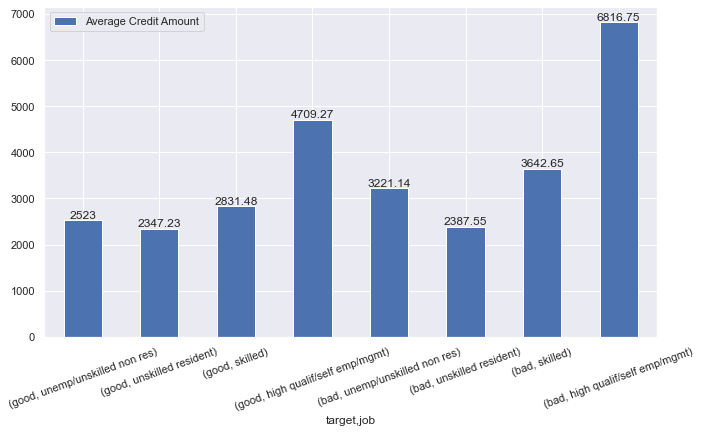

In [37]:
axis = temp.plot.bar(figsize=hlp.plot.STANDARD_WIDTH_HEIGHT, rot=20)
axis.bar_label(axis.containers[0])
plt.tight_layout()

In [38]:
temp.unstack().round(1)

Average Credit Amount                             \
job    unemp/unskilled non res unskilled resident skilled   
target                                                      
good                    2523.0             2347.2  2831.5   
bad                     3221.1             2387.6  3642.7   

                                  
job    high qualif/self emp/mgmt  
target                            
good                      4709.3  
bad                       6816.7

In [39]:
unstacked = temp.unstack()
unstacked.columns = unstacked.columns.droplevel()
unstacked.round(1)

job,unemp/unskilled non res,unskilled resident,skilled,high qualif/self emp/mgmt
target,,,,
good,2523.0,2347.2,2831.5,4709.3
bad,3221.1,2387.6,3642.7,6816.7


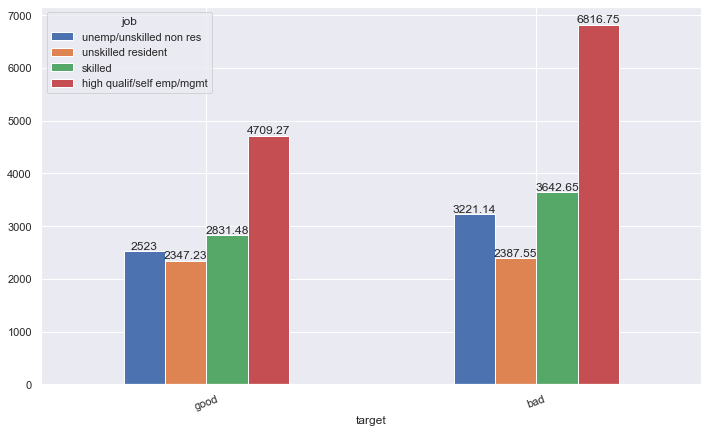

In [40]:
axis = unstacked.plot.bar(figsize=hlp.plot.STANDARD_WIDTH_HEIGHT, rot=20)
for container in axis.containers:
    axis.bar_label(container)
plt.tight_layout()

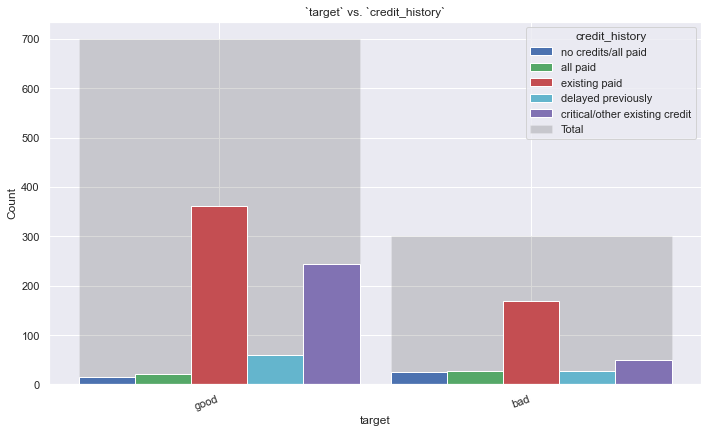

In [41]:
hlp.plot.plot_dodged_barchart(dataframe=credit_data, outer_column='target', inner_column='credit_history')

In [42]:
hlp.plot.plot_histogram_with_categorical(dataframe=credit_data, numeric_column='credit_amount', categorical_column='target')

ValueError: items in new_categories are not the same as in old categories

# Time Series

## Monthly Count

In [34]:
flights_5k = data.flights_5k()

In [35]:
flights_5k['date_month'] = hlp.date.floor(flights_5k['date'], granularity=hlp.date.Granularity.MONTH)

In [36]:
flights_5k['origin_top_5'] = hlp.pandas.top_n_categories(categorical=flights_5k['origin'])

In [37]:
flights_5k.head()

,date,delay,distance,origin,destination,date_month,origin_top_5
0,2001-01-10 18:20:00,25,192,SAT,HOU,2001-01-01,Other
1,2001-01-31 16:45:00,17,371,SNA,OAK,2001-01-01,Other
2,2001-02-16 12:07:00,21,417,SJC,SAN,2001-02-01,Other
3,2001-02-03 17:00:00,-5,480,SMF,SAN,2001-02-01,Other
4,2001-01-02 12:16:00,5,833,OKC,PHX,2001-01-01,Other


In [38]:
per_month_per_origin = flights_5k.groupby(['date_month', 'origin_top_5']).size()
per_month_per_origin.head(10)

date_month  origin_top_5
2001-01-01  LAS              112
            PHX               95
            HOU               95
            DAL               78
            BWI               79
            Other           1201
2001-02-01  LAS               99
            PHX               97
            HOU               74
            DAL               75
dtype: int64

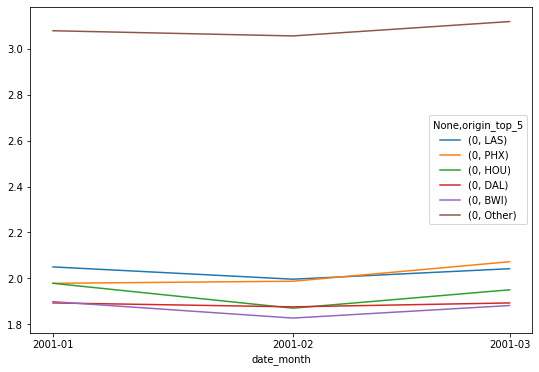

In [39]:
import matplotlib.dates as mdates
ax = pd.DataFrame(np.log10(per_month_per_origin)).unstack().plot(figsize=(9, 6))
ax.xaxis.set_major_locator(mdates.MonthLocator())